In [47]:
import pandas as pd
import numpy as np

In [48]:
dataset = pd.read_csv('preprocessed.csv',index_col='year',parse_dates=True)
dataset = dataset.fillna(0)
dataset.head()

,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
year,,,,,,,,,,,,,
2001-01-01,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
2002-01-01,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2003-01-01,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
2004-01-01,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
2005-01-01,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80


In [49]:
dataset.shape

(1009, 13)

In [50]:
section1 = dataset.iloc[0:10,:9]
section1

,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9
year,,,,,,,,,
2001-01-01,324.0,354.5,17.0,0.0,3,117,2600,400,0.0
2002-01-01,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0
2003-01-01,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0
2004-01-01,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0
2005-01-01,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0
2006-01-01,324.0,225.0,17.2,0.0,4,114,6630,1500,0.0
2007-01-01,324.0,130.0,18.4,0.0,3,103,6700,1540,0.9
2008-01-01,324.0,100.6,19.0,0.0,2,114,6740,1590,0.9
2009-01-01,324.0,176.5,19.0,0.0,3,108,7175,1787,3.4


In [51]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
         print("\t",key, ": ", val)
    


In [52]:
ad_test(section1['Para-9'])

1. ADF :  13.392242017821774
2. P-Value :  1.0
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression: 6
5. Critical Values :
	 1% :  -5.354256481481482
	 5% :  -3.6462381481481483
	 10% :  -2.901197777777778


In [53]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(section1['Para-9'],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=64.448, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=64.679, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=64.376, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=64.237, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.490 seconds


In [54]:
from pmdarima import auto_arima

def print_best_model(data,parameter):
    stepwise_fit = auto_arima(data[parameter],trace=True,suppress_warnings=True)
    return stepwise_fit.get_params().get("order")

print_best_model(section1,"Para-9")

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=64.448, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=64.679, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=64.376, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=64.237, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.478 seconds


(0, 0, 0)

In [55]:
#apply arima
from statsmodels.tsa.arima.model import ARIMA

def Arima(data,parameter):
    #splitting training and testing
    train = data.iloc[0:-1]
    test = data.iloc[-1:]
    model =  ARIMA(train[parameter],order=(0,0,0))
    model=model.fit()
    # print(model.summary())
    start=len(train)
    end=len(train)+len(test)-1
    pred=model.predict(start=start,end=end,type='levels').rename('ARIMA Predictions')
    print(pred)
    return pred[0]


Arima(section1,"Para-9")


2010-01-01    0.577772
Freq: AS-JAN, Name: ARIMA Predictions, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


0.5777724795831527

In [56]:
def ArimaWithPrint(data,parameter,bestModel):
    #splitting training and testing
    train = data.iloc[0:-1]
    test = data.iloc[-1:]
    model =  ARIMA(train[parameter],order=bestModel)
    model=model.fit()
    # print(model.summary())
    start=len(train)
    end=len(train)+len(test)-1
    pred=model.predict(start=start,end=end,type='levels')
    return pred

In [57]:
import os
from IPython.display import clear_output
from sklearn.metrics import mean_squared_error
from math import sqrt

paramter_to_predict = ["Para-9","Para-10","Para-11","Para-12","Para-13"]
predicted_all_values = []
actual_all_values = []

all_predicted_values = {
    "Para-9":[],
    "Para-10":[],
    "Para-11":[],
    "Para-12":[],
    "Para-13":[]
}
all_actual_values = {
    "Para-9":[],
    "Para-10":[],
    "Para-11":[],
    "Para-12":[],
    "Para-13":[]
}


for i in range(100):
    start = i*10;
    sectionData = dataset.iloc[start:start+10,:]
    for parameter in paramter_to_predict:
        bestModel = print_best_model(sectionData,parameter)
        predictedValue = ArimaWithPrint(sectionData,parameter,bestModel)
        actualValue = sectionData.iloc[-1:][parameter]
        if len(predictedValue)>0:
            predicted_all_values.append(predictedValue[0])
            actual_all_values.append(actualValue[0])
            all_predicted_values[parameter].append(predictedValue)
            all_actual_values[parameter].append(actualValue)
        clear_output(wait=False)

clear_output(wait=False)

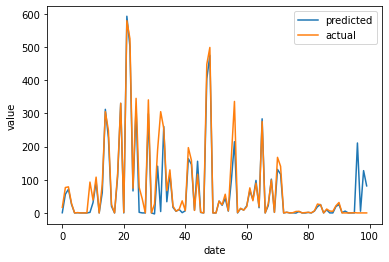

In [59]:
#printing predicted and actual values for parameter 9
from matplotlib import pyplot as plt
pMeter = 'Para-9'
all_predicted_values[pMeter]
all_actual_values[pMeter]
plt.plot(all_predicted_values[pMeter],label="predicted")
plt.plot(all_actual_values[pMeter],label="actual")
plt.xlabel("date")
plt.ylabel("value")
plt.legend()


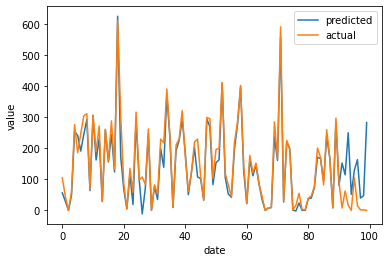

In [60]:
from matplotlib import pyplot as plt
pMeter = 'Para-10'
all_predicted_values[pMeter]
all_actual_values[pMeter]
plt.plot(all_predicted_values[pMeter],label="predicted")
plt.plot(all_actual_values[pMeter],label="actual")
plt.xlabel("date")
plt.ylabel("value")
plt.legend()


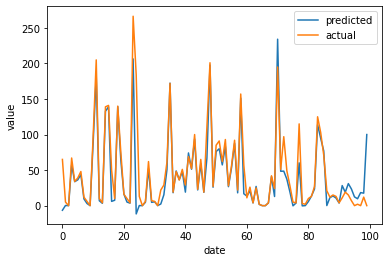

In [61]:
from matplotlib import pyplot as plt
pMeter = 'Para-11'
all_predicted_values[pMeter]
all_actual_values[pMeter]
plt.plot(all_predicted_values[pMeter],label="predicted")
plt.plot(all_actual_values[pMeter],label="actual")
plt.xlabel("date")
plt.ylabel("value")
plt.legend()


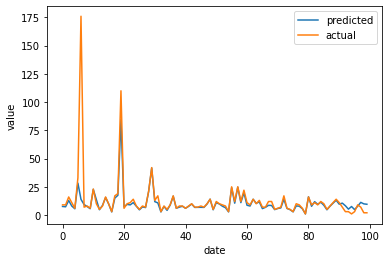

In [62]:
from matplotlib import pyplot as plt
pMeter = 'Para-12'
all_predicted_values[pMeter]
all_actual_values[pMeter]
plt.plot(all_predicted_values[pMeter],label="predicted")
plt.plot(all_actual_values[pMeter],label="actual")
plt.xlabel("date")
plt.ylabel("value")
plt.legend()


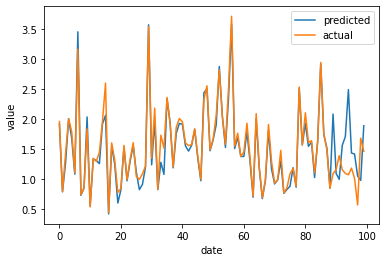

In [63]:
from matplotlib import pyplot as plt
pMeter = 'Para-13'
all_predicted_values[pMeter]
all_actual_values[pMeter]
plt.plot(all_predicted_values[pMeter],label="predicted")
plt.plot(all_actual_values[pMeter],label="actual")
plt.xlabel("date")
plt.ylabel("value")
plt.legend()


In [58]:
rmse = sqrt(mean_squared_error(predicted_all_values,actual_all_values))
print(rmse)

34.408938187921784
